In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

import warnings
warnings.filterwarnings("ignore")

print("Labraries Loaded Successfully")

In [2]:
df = pd.read_csv("covid_dirty_dataset.csv")
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized
0,2020-04-01,India,2000.0,50,150,1800,200,5,30,50000,1380000000,Yes,0,0,120
1,01-04-2020,India,2200.0,55,180,1965,200,5,30,52000,1380000000,yes,0,0,130
2,2020/04/02,India,2500.0,60,200,2240,300,5,20,54000,1380000000,YES,0,0,150
3,2020-04-03,India,3000.0,75,250,2675,-100,15,50,56000,1380000000,No,0,0,200
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000,1380000000,no,0,0,250


In [3]:
df.shape

(21, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  21 non-null     object 
 1   Country               21 non-null     object 
 2   Confirmed             20 non-null     float64
 3   Deaths                21 non-null     int64  
 4   Recovered             21 non-null     int64  
 5   Active                21 non-null     int64  
 6   New_Cases             21 non-null     int64  
 7   New_Deaths            21 non-null     int64  
 8   New_Recovered         21 non-null     int64  
 9   Tests_Conducted       21 non-null     object 
 10  Population            21 non-null     int64  
 11  Lockdown_Status       21 non-null     object 
 12  Vaccinated            21 non-null     int64  
 13  Partially_Vaccinated  21 non-null     int64  
 14  Hospitalized          21 non-null     int64  
dtypes: float64(1), int64(10),

In [5]:
df.isnull().sum()

Date                    0
Country                 0
Confirmed               1
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Tests_Conducted         0
Population              0
Lockdown_Status         0
Vaccinated              0
Partially_Vaccinated    0
Hospitalized            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Date                    0
Country                 0
Confirmed               1
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Tests_Conducted         0
Population              0
Lockdown_Status         0
Vaccinated              0
Partially_Vaccinated    0
Hospitalized            0
dtype: int64

In [9]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)

In [10]:
df.isnull().sum()

Date                    10
Country                  0
Confirmed                1
Deaths                   0
Recovered                0
Active                   0
New_Cases                0
New_Deaths               0
New_Recovered            0
Tests_Conducted          0
Population               0
Lockdown_Status          0
Vaccinated               0
Partially_Vaccinated     0
Hospitalized             0
dtype: int64

In [11]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000,1380000000,Yes,0,0,120
1,NaT,India,2200.0,55,180,1965,200,5,30,52000,1380000000,yes,0,0,130
2,NaT,India,2500.0,60,200,2240,300,5,20,54000,1380000000,YES,0,0,150
3,2020-03-04,India,3000.0,75,250,2675,-100,15,50,56000,1380000000,No,0,0,200
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000,1380000000,no,0,0,250


# Convert Numeric Columns

In [13]:
cols = ["Confirmed","Deaths","Recovered","Active",
        "New_Cases","New_Deaths","New_Recovered",
        "Tests_Conducted","Vaccinated",
        "Partially_Vaccinated","Hospitalized"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [14]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120
1,NaT,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,yes,0,0,130
2,NaT,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,YES,0,0,150
3,2020-03-04,India,3000.0,75,250,2675,-100,15,50,56000.0,1380000000,No,0,0,200
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,no,0,0,250


# Handle Missing Values

In [16]:
df.fillna(method="ffill", inplace=True)


In [17]:
df = df[df["New_Cases"]>=0]

In [18]:
df.isnull().sum()

Date                    0
Country                 0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Tests_Conducted         0
Population              0
Lockdown_Status         0
Vaccinated              0
Partially_Vaccinated    0
Hospitalized            0
dtype: int64

In [19]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,yes,0,0,130
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,YES,0,0,150
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,no,0,0,250
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,N,0,0,300


In [21]:
df["Lockdown_Status"] = df["Lockdown_Status"].str.strip().str.lower()

df["Lockdown_Status"] = df["Lockdown_Status"].replace({
    "yes":"Yes",
    "y":"Yes",
    "no":"No",
    "n":"No"
})


In [22]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,Yes,0,0,130
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,Yes,0,0,150
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,No,0,0,250
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,No,0,0,300


# Data Cleanig Complete

# Calculate Death Rate

In [25]:
df["Death_Rate"] = (df["Deaths"] / df["Confirmed"]) * 100


Calculate Recovery Rate

In [27]:
df["Recovery_Rate"] = (df["Recovered"] / df["Confirmed"]) * 100


# Daily Growth Percentage

In [30]:
df["Daily_Growth_%"] = df.groupby("Country")["Confirmed"].pct_change() * 100


# Confirmed Cases Over Time

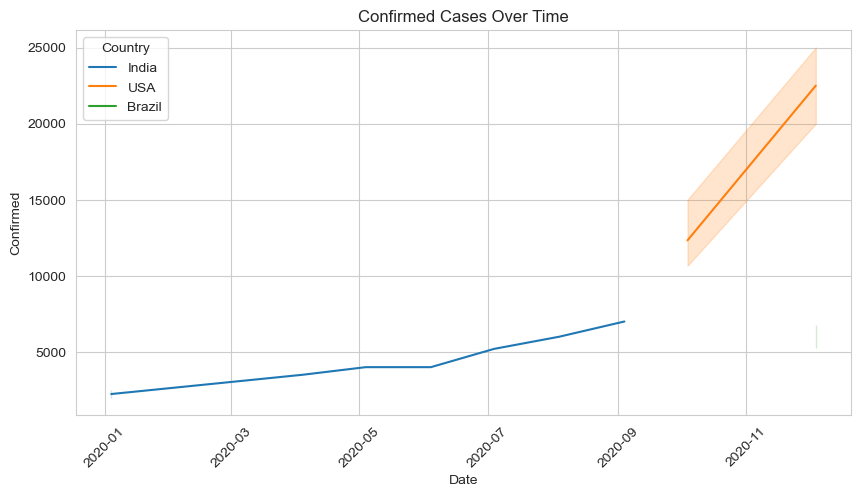

In [31]:
sns.lineplot(x="Date", y="Confirmed", hue="Country", data=df)
plt.title("Confirmed Cases Over Time")
plt.xticks(rotation=45)
plt.show()


In [32]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized,Death_Rate,Recovery_Rate,Daily_Growth_%
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120,2.500000,7.500000,NaN
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,Yes,0,0,130,2.500000,8.181818,10.000000
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,Yes,0,0,150,2.400000,8.000000,13.636364
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,No,0,0,250,2.571429,8.571429,40.000000
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,No,0,0,300,2.750000,10.000000,14.285714


In [33]:
df.fillna(method="ffill", inplace=True)


In [34]:
df.isnull().sum()

Date                    0
Country                 0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Tests_Conducted         0
Population              0
Lockdown_Status         0
Vaccinated              0
Partially_Vaccinated    0
Hospitalized            0
Death_Rate              0
Recovery_Rate           0
Daily_Growth_%          1
dtype: int64

In [35]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized,Death_Rate,Recovery_Rate,Daily_Growth_%
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120,2.500000,7.500000,NaN
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,Yes,0,0,130,2.500000,8.181818,10.000000
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,Yes,0,0,150,2.400000,8.000000,13.636364
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,No,0,0,250,2.571429,8.571429,40.000000
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,No,0,0,300,2.750000,10.000000,14.285714


In [36]:
df[df["Daily_Growth_%"].isnull()]


,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized,Death_Rate,Recovery_Rate,Daily_Growth_%
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120,2.5,7.5,NaN


In [38]:
df["Daily_Growth_%"].fillna(0, inplace=True)


In [39]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized,Death_Rate,Recovery_Rate,Daily_Growth_%
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120,2.500000,7.500000,0.000000
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,Yes,0,0,130,2.500000,8.181818,10.000000
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,Yes,0,0,150,2.400000,8.000000,13.636364
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,No,0,0,250,2.571429,8.571429,40.000000
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,No,0,0,300,2.750000,10.000000,14.285714


# Daily New cases

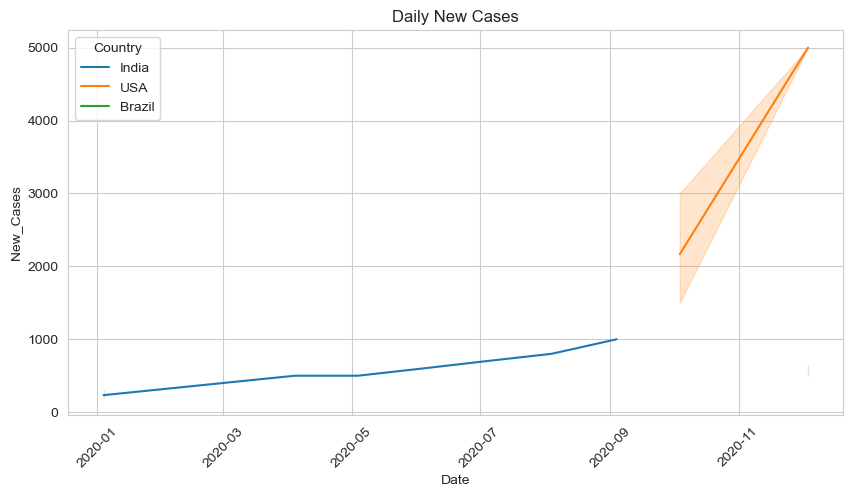

In [40]:
sns.lineplot(x="Date", y="New_Cases", hue="Country", data=df)
plt.title("Daily New Cases")
plt.xticks(rotation=45)
plt.show()

# Death Rate Comparision

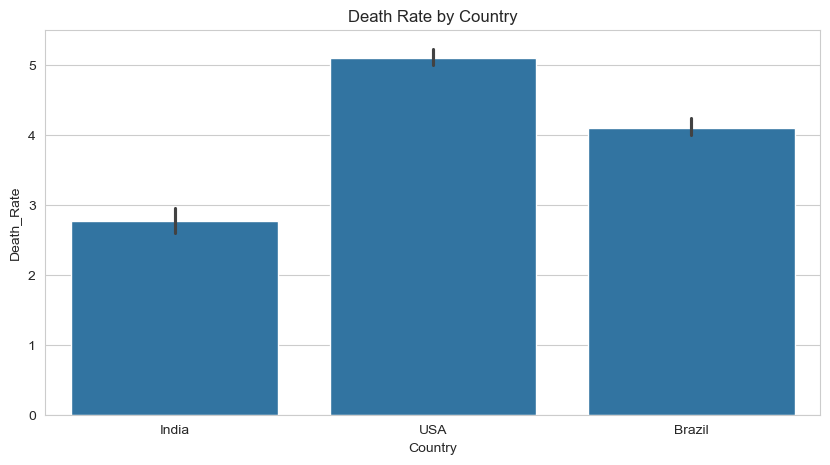

In [41]:
sns.barplot(x="Country", y="Death_Rate", data=df)
plt.title("Death Rate by Country")
plt.show()

# Recovery Rate Comparison

In [42]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New_Cases,New_Deaths,New_Recovered,Tests_Conducted,Population,Lockdown_Status,Vaccinated,Partially_Vaccinated,Hospitalized,Death_Rate,Recovery_Rate,Daily_Growth_%
0,2020-01-04,India,2000.0,50,150,1800,200,5,30,50000.0,1380000000,Yes,0,0,120,2.500000,7.500000,0.000000
1,2020-01-04,India,2200.0,55,180,1965,200,5,30,52000.0,1380000000,Yes,0,0,130,2.500000,8.181818,10.000000
2,2020-01-04,India,2500.0,60,200,2240,300,5,20,54000.0,1380000000,Yes,0,0,150,2.400000,8.000000,13.636364
4,2020-04-04,India,3500.0,90,300,3110,500,15,50,58000.0,1380000000,No,0,0,250,2.571429,8.571429,40.000000
5,2020-05-04,India,4000.0,110,400,3490,500,20,100,60000.0,1380000000,No,0,0,300,2.750000,10.000000,14.285714


In [43]:
df.isnull().sum()

Date                    0
Country                 0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Tests_Conducted         0
Population              0
Lockdown_Status         0
Vaccinated              0
Partially_Vaccinated    0
Hospitalized            0
Death_Rate              0
Recovery_Rate           0
Daily_Growth_%          0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18 non-null     datetime64[ns]
 1   Country               18 non-null     object        
 2   Confirmed             18 non-null     float64       
 3   Deaths                18 non-null     int64         
 4   Recovered             18 non-null     int64         
 5   Active                18 non-null     int64         
 6   New_Cases             18 non-null     int64         
 7   New_Deaths            18 non-null     int64         
 8   New_Recovered         18 non-null     int64         
 9   Tests_Conducted       18 non-null     float64       
 10  Population            18 non-null     int64         
 11  Lockdown_Status       18 non-null     object        
 12  Vaccinated            18 non-null     int64         
 13  Partially_Vaccinated  18 no

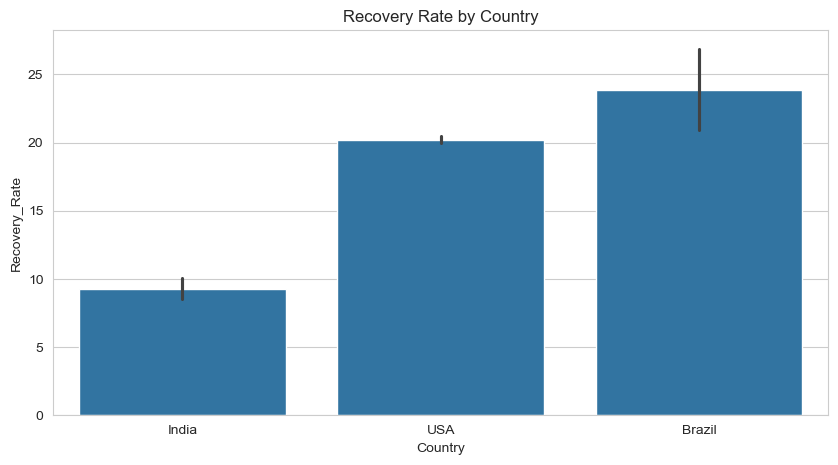

In [45]:
sns.barplot(x="Country", y="Recovery_Rate", data=df)
plt.title("Recovery Rate by Country")
plt.show()

# Lockdown Impact

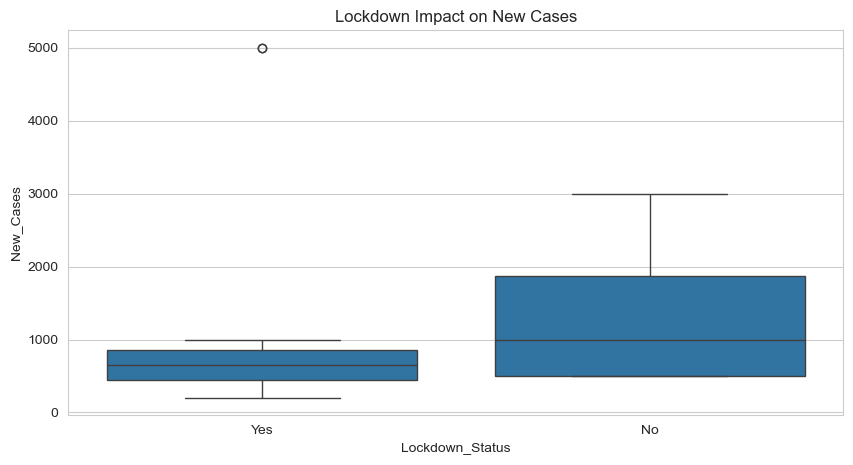

In [50]:
sns.boxplot(x="Lockdown_Status", y="New_Cases", data=df)
plt.title("Lockdown Impact on New Cases")
plt.show()


# Correlation Heatmap

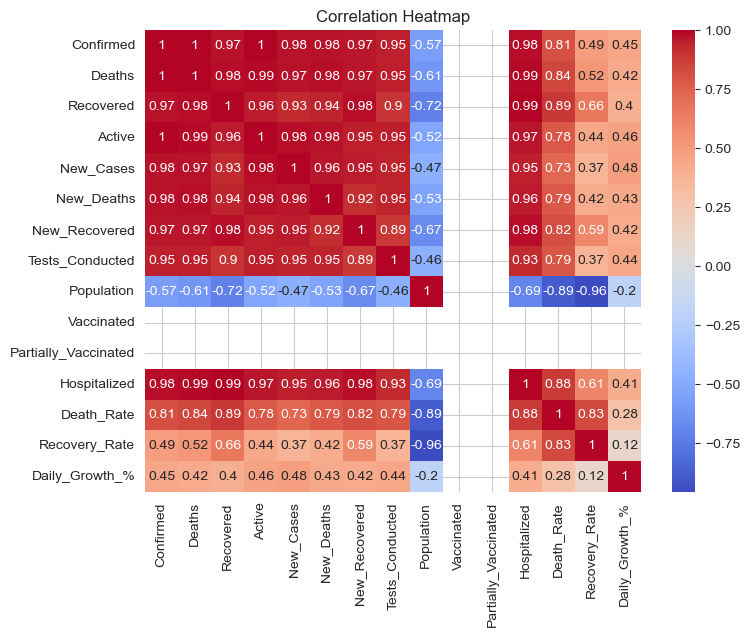

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Country Wise Total Cases

In [53]:
df.groupby("Country")["Confirmed"].max()

Country
Brazil     7000.0
India      7000.0
USA       25000.0
Name: Confirmed, dtype: float64

In [55]:
df.sort_values("Daily_Growth_%", ascending=False)[["Date","Country","Daily_Growth_%"]].head()


,Date,Country,Daily_Growth_%
4,2020-04-04,India,40.000000
13,2020-12-04,USA,33.333333
7,2020-07-04,India,30.000000
14,2020-12-04,USA,25.000000
15,2020-12-04,Brazil,25.000000


In [56]:
country_summary = df.groupby("Country").agg({
    "Confirmed":"max",
    "Deaths":"max",
    "Recovered":"max",
    "Active":"max"
}).reset_index()

country_summary


,Country,Confirmed,Deaths,Recovered,Active
0,Brazil,7000.0,300,2000,4700
1,India,7000.0,220,700,6080
2,USA,25000.0,1300,5000,18700


In [57]:
country_summary["Death_Rate"] = (country_summary["Deaths"] / country_summary["Confirmed"]) * 100
country_summary["Recovery_Rate"] = (country_summary["Recovered"] / country_summary["Confirmed"]) * 100

country_summary


,Country,Confirmed,Deaths,Recovered,Active,Death_Rate,Recovery_Rate
0,Brazil,7000.0,300,2000,4700,4.285714,28.571429
1,India,7000.0,220,700,6080,3.142857,10.000000
2,USA,25000.0,1300,5000,18700,5.200000,20.000000


In [58]:
country_summary.sort_values("Death_Rate")


,Country,Confirmed,Deaths,Recovered,Active,Death_Rate,Recovery_Rate
1,India,7000.0,220,700,6080,3.142857,10.000000
0,Brazil,7000.0,300,2000,4700,4.285714,28.571429
2,USA,25000.0,1300,5000,18700,5.200000,20.000000


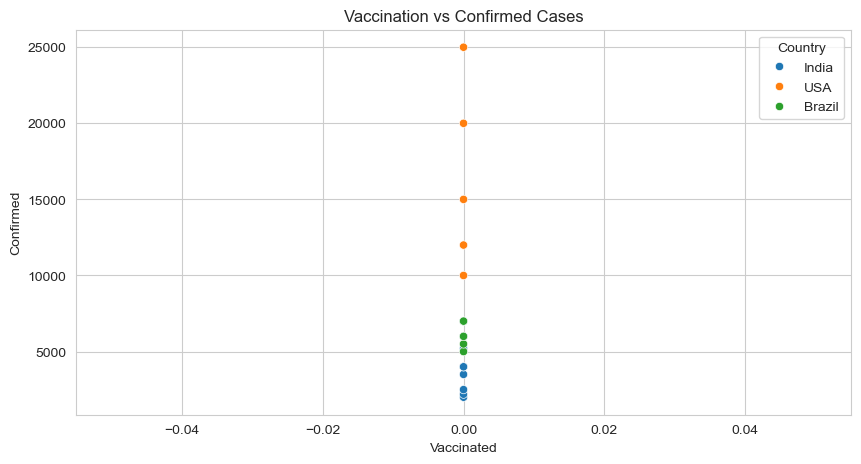

In [59]:
sns.scatterplot(x="Vaccinated", y="Confirmed", hue="Country", data=df)
plt.title("Vaccination vs Confirmed Cases")
plt.show()


In [73]:
print(country_summary.columns)


Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Death_Rate',
       'Recovery_Rate'],
      dtype='object')


In [74]:
country_summary.head()

,Country,Confirmed,Deaths,Recovered,Active,Death_Rate,Recovery_Rate
0,Brazil,7000.0,300,2000,4700,4.285714,28.571429
1,India,7000.0,220,700,6080,3.142857,10.000000
2,USA,25000.0,1300,5000,18700,5.200000,20.000000


In [75]:
country_summary.isnull().sum()

Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
Death_Rate       0
Recovery_Rate    0
dtype: int64